# Applying vision language models and image generation in a loop
In this notebook we apply a vision language model and an image generation model in a loop. The description generated by the vision model is passed to the image generation model as prompt. The resulting images are stored to disk.

In [1]:
import openai
from skimage.io import imread, imsave
import stackview
from image_utilities import numpy_to_bytestream
import base64
from stackview._image_widget import _img_to_rgb

We define two helper functions for vision and image generation.

In [2]:
def prompt_dall_e(prompt:str, width:int=1024, height:int=1024, model='dall-e-3'):
    """
    Generate an image from a given prompt.
    """
    client = openai.OpenAI()

    response = client.images.generate(
      prompt=prompt,
      model=model,
      n=1,
      size=f"{width}x{height}"
    )

    image_url = response.data[0].url

    image = imread(image_url)[::2, ::2]

    return image

In [3]:
def prompt_chatGPT(prompt:str, image, model="gpt-4o"):
    """Sends a prompt and an image to openAI
    and returns the text response.
    """
    rgb_image = _img_to_rgb(image)
    byte_stream = numpy_to_bytestream(rgb_image)
    base64_image = base64.b64encode(byte_stream).decode('utf-8')

    message = [{"role": "user", "content": [{
        "type": "image_url",
        "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
        }
    }]}]
            
    # setup connection to the LLM
    client = openai.OpenAI()
    
    # submit prompt
    response = client.chat.completions.create(
        model=model,
        messages=message
    )
    
    # extract answer
    return response.choices[0].message.content

In [4]:
image_filename = "data/real_cat_00.png"

image = imread(image_filename)

## The loop

Next we run both function in a loop. The image description that is used for prompting the next image is printed between the images.

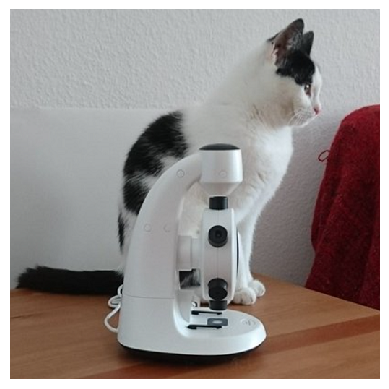

In the image, there is a white and black cat sitting beside a white microscope on a wooden surface. The cat is facing to the side and appears to be looking away from the camera. The microscope is a standard optical microscope with an eyepiece, focus knobs, and a stage for holding samples. The setting appears to be indoors, with a plain wall and a red cloth or blanket visible in the background.


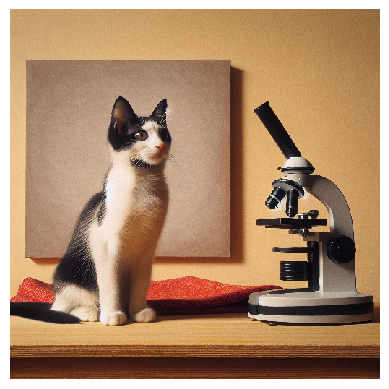

The image shows a black and white cat sitting on a wooden surface next to a microscope. The setting appears indoors, with a light brown wall in the background and a piece of artwork hanging on it. The cat seems to be inquisitive, creating a juxtaposition between the natural curiosity of the animal and the scientific instrument beside it.


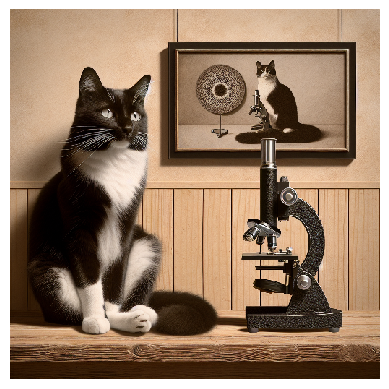

This image shows a black and white cat sitting next to a vintage microscope. On the wall behind the cat, there is a framed picture of another black and white cat also sitting next to a similar microscope. The setting suggests an interesting juxtaposition of a scientific theme with the presence of cats, giving it a charming and whimsical touch.


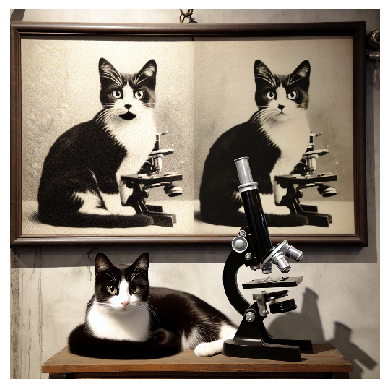

This image shows a black and white cat sitting on a table beside a microscope, with a framed photograph above it. The photograph appears to be of the same cat next to a microscope, positioned similarly to the cat in the present scene. The cat and the photograph have a similar pose and setting, creating a visual connection between the two. The image has a vintage aesthetic.


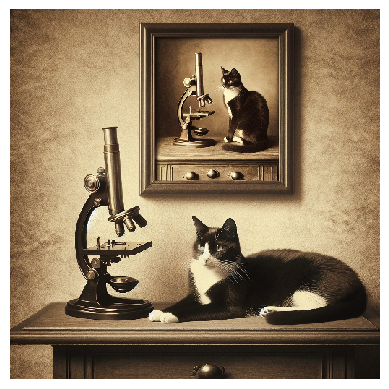

In the image, there is a photograph of a cat lying on a wooden table next to a microscope. Above the table, there's a framed picture that appears to be a vintage-style photograph featuring the same cat and microscope in the same positions. The overall ambiance of the image is classic and sepia-toned, giving it a nostalgic feel. The cat is black and white and appears calm and comfortable beside the scientific instrument.


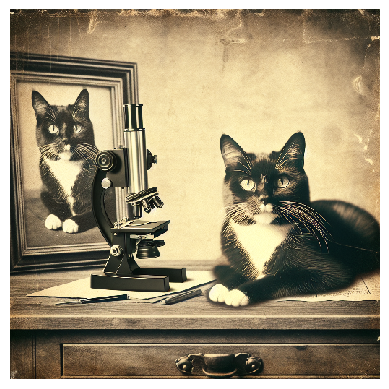

This image features a vintage-style setup with a black and white cat sitting on a wooden desk. On the desk, there is a microscope and a pen. Behind the cat, there is a framed picture of what appears to be the same cat, along with the microscope. The scene has a sepia-toned, old photograph look, giving it an antique feel. The cat in both the photograph and the present scene has a distinctive black-and-white coat.


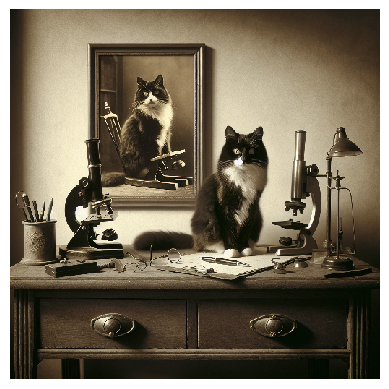

The image depicts a whimsical scene featuring a black and white cat sitting on a wooden desk. The desk is cluttered with various scientific instruments, including two microscopes, a pair of glasses, some books, a quill, and an inkpot, among other items. Behind the cat, there is a framed painting of the same cat, also sitting on a chair. The overall atmosphere is reminiscent of a scientist's study or laboratory, with a vintage or antique feel.


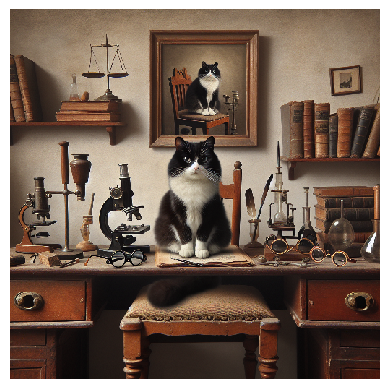

This image depicts a whimsical scene with a black and white cat sitting on a desk, surrounded by vintage scientific instruments, including microscopes, glassware, and books. On the wall behind the desk, there is a framed portrait of the same cat, adding a quirky and charming element to the image. The setting has an old-fashioned, scholarly atmosphere, further enhanced by the presence of numerous old books and antique items. The cat at the center appears to be the "scholar" in this imaginative setup.


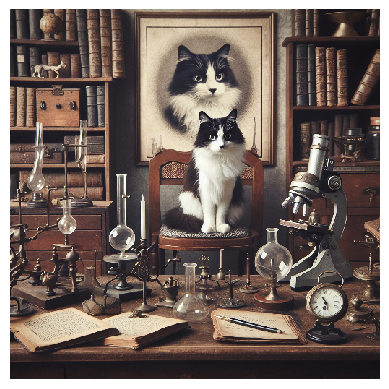

The image depicts a cat sitting on a chair in what appears to be an old-fashioned laboratory or study. The study is filled with various scientific equipment, including glass flasks, a microscope, a clock, and other instruments. Shelves of books and various curiosities surround the scene. A large portrait of what appears to be the same cat, framed and hanging on the wall, overlooks the space, giving the whole setting a whimsical and humorous feel. The lighting and overall composition suggest a vintage aesthetic.


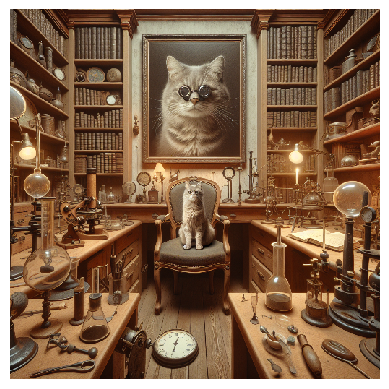

This image depicts a whimsical and vintage-style library or study room. The room is filled with various scientific equipment, such as beakers, test tubes, microscopes, and other laboratory apparatus, suggesting a setting reminiscent of a 19th-century scientist or inventor's workspace.

At the center of the image, an anthropomorphic cat sits poised in an ornate chair, giving the room an air of eccentricity. The cat wears a serious expression, adding to the whimsical atmosphere.

Above the cat, a large portrait hangs on the wall. The portrait is of another cat, possibly wearing glasses, reinforcing the surreal and humorous theme of the image.

The room is lined with numerous shelves, all laden with antique books and scientific instruments. The overall mood of the room is cozy and nostalgic, with warm lighting contributing to the inviting yet slightly mysterious ambiance.


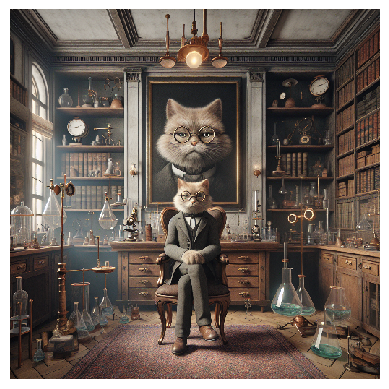

This whimsical image depicts an anthropomorphic cat dressed in formal attire, seated in an elaborate and ornate study full of scientific equipment and books. The setting is reminiscent of a vintage laboratory or study room, with antique furniture, glass beakers, bookshelves, and scientific instruments. The cat in the portrait behind the seated cat suggests a dignified, scholarly atmosphere. The entire scene gives off an air of sophistication and intellect.


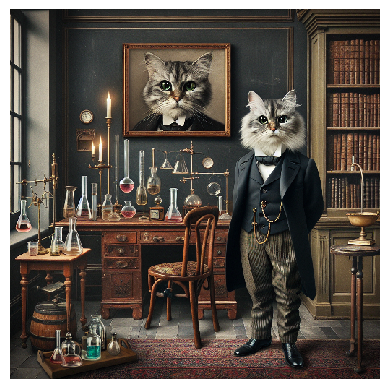

This image depicts a fanciful scene featuring a cat dressed in Victorian-era attire standing in what appears to be a chemistry laboratory. The cat is wearing a formal suit with a bow tie, vest, and striped pants. The laboratory around the cat is filled with various scientific equipment, including glass beakers, flasks, test tubes, and other laboratory apparatus. There is also an old wooden desk and chair, along with bookshelves filled with books. On the wall behind the cat, there is a portrait of another cat similarly dressed in formal Victorian clothing.

This imaginative image blends elements of historical fashion and scientific exploration with playful, anthropomorphic cat characters, creating a whimsical and charming scene.


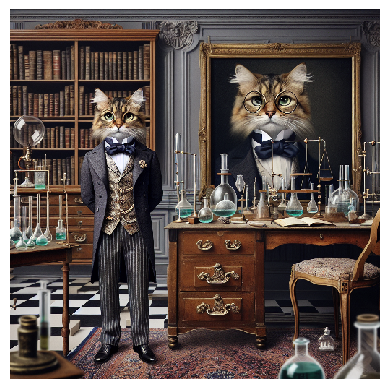

This image depicts an anthropomorphic cat dressed in a smart suit, standing in a well-furnished, old-fashioned study or laboratory filled with scientific instruments and glassware. There's also a painting of a cat wearing a similar outfit hanging on the wall. The setting includes a large wooden desk, bookshelves filled with books, and various laboratory equipment like flasks and beakers. The general atmosphere is reminiscent of a historical or vintage scientific study, and the cat is portrayed in a dignified, scholarly manner.


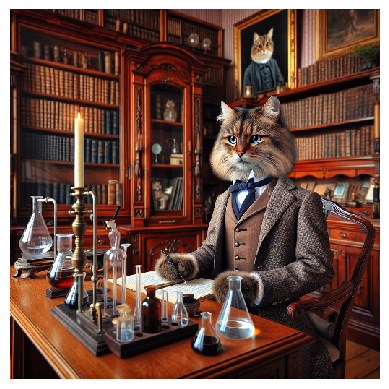

The image depicts a sophisticated scene in a vintage study, where a cat dressed in Victorian-era attire sits at a wooden desk surrounded by scientific instruments and books. The cat, wearing a suit and bow tie, appears to be engaged in scientific work, with beakers and test tubes arranged on the desk. The background is filled with bookshelves, and a portrait of another cat hangs on the wall, adding to the scholarly atmosphere. The lighting from the candle on the desk adds a warm and historical ambiance to the scene. This whimsical illustration combines elements of history, science, and fantasy, presenting the cat as a learned scholar or scientist.


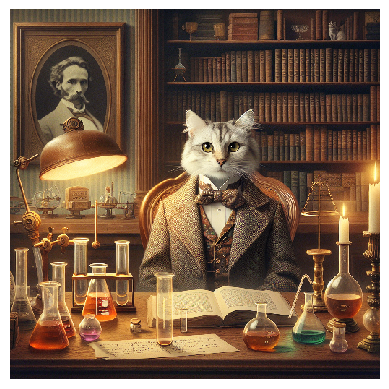

This image depicts a whimsical and surreal scene of a cat dressed in a Victorian-era suit, seemingly conducting experiments in an elaborately decorated, old-fashioned laboratory. The cat is surrounded by various scientific instruments, including glass beakers, flasks filled with colorful liquids, books, and candles. The setting includes a bookshelf brimming with books in the background, and a framed portrait of a distinguished gentleman on the wall, adding to the historical and academic atmosphere. The overall scene evokes a sense of curiosity and blends elements of historical scientific exploration with playful imagination.


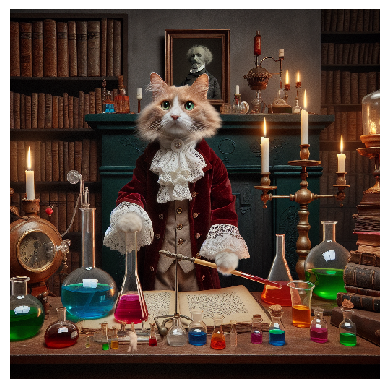

In the image, there appears to be a cat dressed in old-fashioned scientist attire, complete with a ruffled cravat and coat, standing amidst various chemistry equipment such as beakers, flasks, and test tubes. The setting resembles a vintage laboratory or study, with shelves filled with books in the background and several lit candles adding to the ambiance. The cat seems to be in the process of conducting a scientific experiment as it holds a test tube with colorful liquids around it. The overall scene has a whimsical and historical feel.


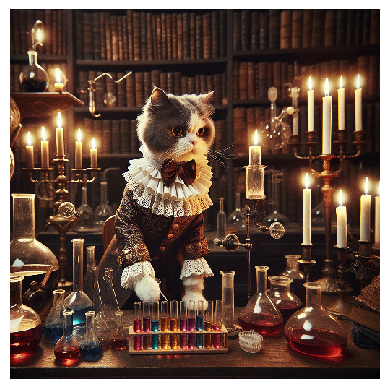

This is an image of a cat dressed in historical, ornate clothing, resembling that of a scholar or scientist from an earlier era. The cat stands among various laboratory equipment, including beakers, flasks, and test tubes filled with colorful liquids. The scene is set in an old-fashioned, candle-lit study or laboratory, with bookshelves filled with books in the background. The overall atmosphere is reminiscent of a vintage or steampunk style. Despite the whimsical nature of the cat's attire and setting, it creates a charming and imaginative scene.


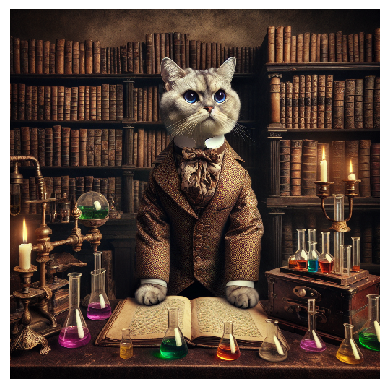

The image depicts a cat dressed in Victorian-era attire, standing upright in a library setting. The cat is wearing a suit, complete with a bow tie, and is surrounded by chemistry lab equipment, including beakers filled with colorful liquids, test tubes, and lit candles. An open book lies in front of the cat on the table, adding to the scholarly and alchemical ambiance. The background consists of antique bookshelves filled with old books, further enhancing the historic and academic feel of the scene. The cat's expression is serious, giving it an aura of a distinguished scholar or scientist.


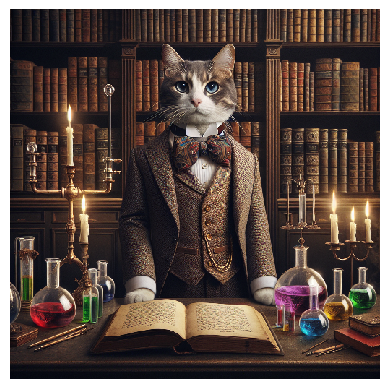

This is a whimsical and imaginative image featuring a cat dressed in a vintage suit standing in what looks like an old-fashioned study or library. The cat is wearing a bow tie and a three-piece suit, and is surrounded by books, candles, and scientific equipment such as beakers and flasks filled with colorful liquids. The setting has a historical and academic vibe, adding to the humorous and creative nature of the image.


In [5]:
for i in range(1, 20):
    stackview.imshow(image)
    
    description = prompt_chatGPT("Describe this image.", image)
    
    print(description)
    
    image = prompt_dall_e(description)
    
    imsave(image_filename.replace("_00.png", f"_{i:02}.png"), image)